In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import datasets, layers, models
sns.set_style('whitegrid')

In [2]:
(train_images,train_labels), (test_images,test_labels) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [3]:
train_images.shape

(50000, 32, 32, 3)

In [4]:
test_images.shape

(10000, 32, 32, 3)

In [5]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [6]:
train_images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
train_images[0].shape

(32, 32, 3)

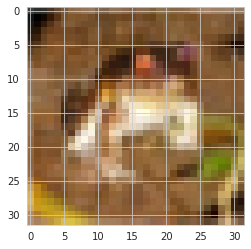

In [8]:
plt.imshow(train_images[0])

In [9]:
train_labels[0]

array([6], dtype=uint8)

In [10]:
train_labels[34]

array([4], dtype=uint8)

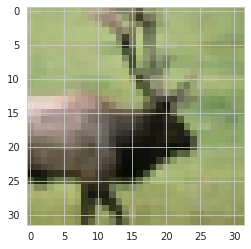

In [11]:
plt.imshow(train_images[34])

In [12]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

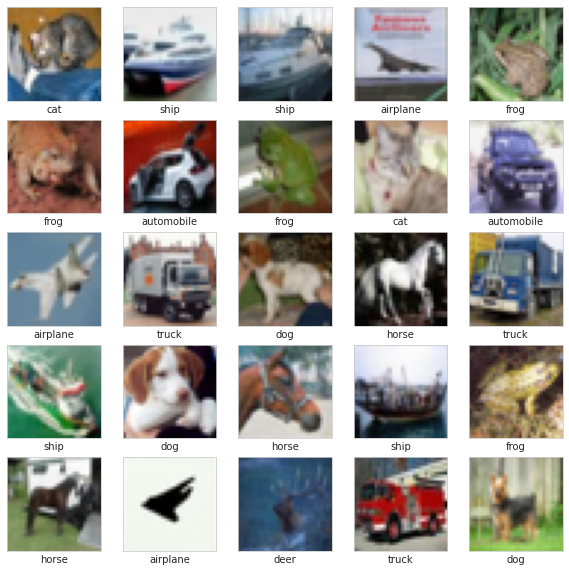

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i][0]])
plt.show()

In [14]:
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [15]:
class_names[test_labels[2][0]]

'ship'

In [16]:
test_labels[2]

array([8], dtype=uint8)

In [17]:
train_images,test_images = train_images / 255.0, test_images / 255.0

In [18]:
train_images[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [21]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [22]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [23]:
history = model.fit(train_images,train_labels,epochs=50,
                   validation_data=(test_images,test_labels))

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 18s 5ms/step - loss: 1.5354 - accuracy: 0.4380 - val_loss: 1.2469 - val_accuracy: 0.5560
Epoch 2/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1530 - accuracy: 0.5927 - val_loss: 1.1054 - val_accuracy: 0.6078
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0008 - accuracy: 0.6490 - val_loss: 0.9718 - val_accuracy: 0.6629
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9033 - accuracy: 0.6830 - val_loss: 0.9170 - val_accuracy: 0.6862
Epoch 5/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8261 - accuracy: 0.7099 - val_loss: 0.9113 - val_accuracy: 0.6859
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7654 - accuracy: 0.7329 - val_loss: 0.8615 - val_accuracy: 0.7069
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7125 - accuracy: 0.7513 - val_loss: 0.8438 - val_accuracy: 0.7131
Ep

In [24]:
history.history

{'accuracy': [0.4380199909210205,
  0.592739999294281,
  0.6490200161933899,
  0.6830400228500366,
  0.7099400162696838,
  0.7328600287437439,
  0.7512800097465515,
  0.7661799788475037,
  0.781059980392456,
  0.7936999797821045,
  0.8075399994850159,
  0.817080020904541,
  0.8264999985694885,
  0.8382400274276733,
  0.8456599712371826,
  0.8561199903488159,
  0.8652200102806091,
  0.8728399872779846,
  0.8831599950790405,
  0.8874800205230713,
  0.8926200270652771,
  0.899940013885498,
  0.9073600172996521,
  0.9110000133514404,
  0.9186999797821045,
  0.9215999841690063,
  0.9266600012779236,
  0.9270600080490112,
  0.9335799813270569,
  0.9351800084114075,
  0.938319981098175,
  0.9399600028991699,
  0.9421399831771851,
  0.9416199922561646,
  0.9478200078010559,
  0.947920024394989,
  0.9495999813079834,
  0.949999988079071,
  0.953540027141571,
  0.9549199938774109,
  0.9517999887466431,
  0.9556000232696533,
  0.9575799703598022,
  0.95660001039505,
  0.9590799808502197,
  0.9607

(0.0, 2.0)

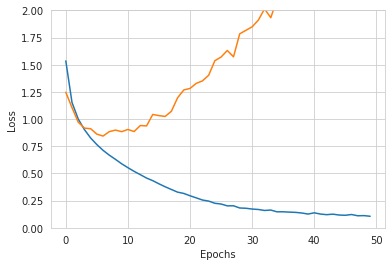

In [25]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 2])

No handles with labels found to put in legend.


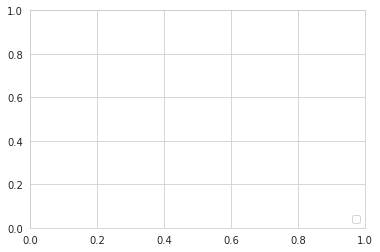

In [26]:
plt.legend(loc='lower right')
plt.show()

Text(0, 0.5, 'accuracy')

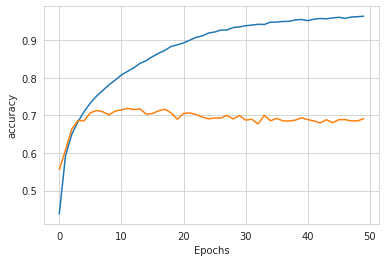

In [27]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
#plt.ylim([0.5, 2])

No handles with labels found to put in legend.


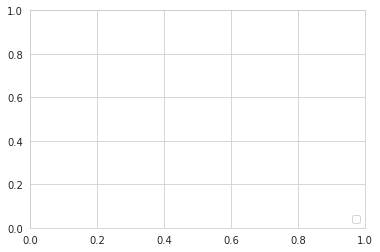

In [28]:
plt.legend(loc='lower right')
plt.show()

In [29]:
test_loss, test_acc = model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 2.6769 - accuracy: 0.6910


In [30]:
test_labels[100]

array([4], dtype=uint8)

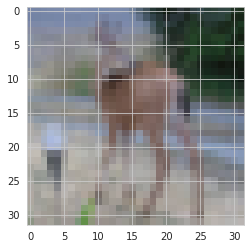

In [31]:
plt.imshow(test_images[100])

In [32]:
model.predict(test_images[100].reshape(1,32,32,3)) #probability

array([[1.64836211e-09, 8.20335445e-13, 5.37527967e-06, 1.72644141e-05,
        1.26592005e-02, 4.65986738e-03, 1.67155765e-08, 9.82658327e-01,
        8.12724166e-10, 7.35115480e-09]], dtype=float32)

In [33]:
model.predict(test_images[100].reshape(1,32,32,3)).round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.98, 0.  , 0.  ]],
      dtype=float32)

In [34]:
np.argmax(model.predict(test_images[100].reshape(1,32,32,3)))

7

In [35]:
test_labels[45]

array([9], dtype=uint8)

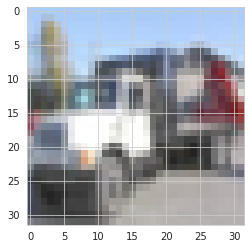

In [36]:
plt.imshow(test_images[45])

In [37]:
model.predict(test_images[45].reshape(1,32,32,3)).round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [38]:
np.argmax(model.predict(test_images[45].reshape(1,32,32,3)))

9

In [39]:
class_names[np.argmax(model.predict(test_images[45].reshape(1,32,32,3)))]

'truck'

In [40]:
test_labels[999]

array([8], dtype=uint8)

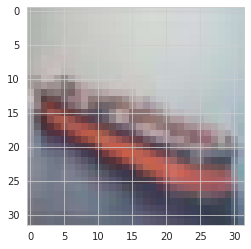

In [41]:
plt.imshow(test_images[999])

In [42]:
class_names[np.argmax(model.predict(test_images[999].reshape(1,32,32,3)))]

'ship'